<a href="https://colab.research.google.com/github/Margo-s-M/Portfolio_Python/blob/master/Portfolio_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Імпорт  бібліотек  
#Підключення Goole Bigquery

In [ ]:
from google.colab import auth ,files
from google.cloud import bigquery

#бібліотеки для аналізу
import pandas as pd
import numpy as np
#бібліотеки для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#бібліотеки для статистики
from scipy import  stats
from scipy.stats import pearsonr, spearmanr, shapiro, kruskal, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Збереження DataFrame у CSV-файл
df.to_csv('dataset_from_bigquery.csv', index=False)

# Вивантаження файлу на комп'ютер
from google.colab import files
files.download('dataset_from_bigquery.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Формування датасету**

1. Формування таблиці
2. Поєднання колонок
3. Перегляд даних
4. Перевірка на консистентність







In [ ]:
# Аутентифікація користувача для доступу до BigQuery
auth.authenticate_user()

#Створення клієнта BigQuery з вказаним проектом
client = bigquery.Client(project="data-analytics-mate")

# SQL-запит для створення датасету
# Ми починаємо з таблиці session, щоб отримати всі сесії. Використовуємо LEFT JOIN для всіх інших таблиць

query = """
SELECT
  s.date as date,
  s.ga_session_id as session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp.medium as source,
  sp.channel,
  ac.id as user_id,
  ac.is_verified,
  ac.is_unsubscribed,
  p.category,
  p.name as product_name,
  p.price,
  p.short_description
FROM
  `data-analytics-mate.DA.session` s
LEFT JOIN
  `data-analytics-mate.DA.session_params` sp ON sp.ga_session_id = s.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.order` o ON o.ga_session_id = s.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.product` p ON p.item_id = o.item_id
LEFT JOIN
  `data-analytics-mate.DA.account_session` acs ON acs.ga_session_id = s.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account` ac ON ac.id = acs.account_id
"""

# Виконання запиту та завантаження результату в Pandas DataFrame
df = client.query(query).to_dataframe()

# Збереження датасету в CSV для подальшого використання
df.to_csv('dataset_from_bigquery.csv', index=False)

#Вивід перших кількох рядків для перевірки
print(df.head())

         date  session_id continent         country   device browser  \
0  2020-11-01  5760483956  Americas   United States  desktop  Chrome   
1  2020-11-01  7115337200    Europe  United Kingdom  desktop  Chrome   
2  2020-11-01  3978035233    Europe          Norway   mobile  Chrome   
3  2020-11-01  9648986282    Africa         Nigeria   mobile  Chrome   
4  2020-11-01  4393441533      Asia           China  desktop  Chrome   

  mobile_model_name operating_system language   source         channel  \
0            Safari        Macintosh       zh  <Other>     Paid Search   
1            Chrome              Web    en-us  organic  Organic Search   
2           <Other>              Web       zh   (none)          Direct   
3           <Other>          Android    es-es   (none)          Direct   
4            Chrome          Windows    en-us   (none)          Direct   

   user_id  is_verified  is_unsubscribed                    category  \
0     <NA>         <NA>             <NA>  Bookcase

In [ ]:
#Загальна інформація
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   session_id         349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   source             349545 non-null  object 
 10  channel            349545 non-null  object 
 11  user_id            27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  product_name       33538 non-null   object 
 16  pr

In [ ]:
# Перевірка на вміст нульових та пропущенних значень
print(df.isnull().sum())

date                      0
session_id                0
continent                 0
country                   0
device                    0
browser                   0
mobile_model_name         0
operating_system          0
language             114266
source                    0
channel                   0
user_id              321600
is_verified          321600
is_unsubscribed      321600
category             316007
product_name         316007
price                316007
short_description    316007
dtype: int64


In [ ]:
# Базова статистика для числових колонок

display(df.describe())
print("\nБазова статистика:")

,session_id,user_id,is_verified,is_unsubscribed,price
count,349545.0,27945.0,27945.0,27945.0,33538.000000
mean,4992250296.631739,659005.065557,0.71698,0.16944,953.298679
std,2887450949.537772,13216.529465,0.450474,0.375147,1317.001775
min,1205.0,636133.0,0.0,0.0,3.000000
25%,2493646855.0,647576.0,0.0,0.0,170.000000
50%,4988476074.0,658952.0,1.0,0.0,445.000000
75%,7491286508.0,670414.0,1.0,0.0,1195.000000
max,9999997129.0,681962.0,1.0,1.0,9585.000000



Базова статистика:


In [ ]:
# Перетворюємо колонку 'date' на datetime64 у вихідному DataFrame
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Обробка пропущених значень
df.fillna({
    'language': 'Unknown',
    'category': 'No Purchase',
    'product_name': 'No Purchase',
    'short_description': 'No Description'
}, inplace=True)

In [ ]:
# Унікальні значення в ключових колонках
print("Унікальні континенти:", df['continent'].unique())
print("Унікальні джерела:", df['source'].unique())
print("Браузери  які відвідувачі використовують для вхочу на сай:", df['browser'].unique())

# Загальна інформація
total_sessions = len(df)
df['is_purchase'] = df['product_name'] != 'No Purchase'
total_purchases = df['is_purchase'].sum()
conversion_rate = (total_purchases / total_sessions) * 100
total_revenue = (df['price'] * df['is_purchase']).sum()
purchases = df[df['is_purchase'] == True]
average_check = purchases['price'].mean()

print(f"Середній чек: {average_check:.2f}")
print(f"Загальний дохід: {total_revenue:.2f}")
print(f"Загальна кількість сесій: {total_sessions}")
print(f"Кількість покупок: {total_purchases}")
print(f"Конверсія: {conversion_rate:.2f}%")

Унікальні континенти: ['Americas' 'Europe' 'Africa' 'Asia' 'Oceania' '(not set)']
Унікальні джерела: ['<Other>' 'organic' '(none)' '(data deleted)' 'referral' 'cpc']
Браузери  які відвідувачі використовують для вхочу на сай: ['Chrome' 'Safari' 'Android Webview' '<Other>' 'Edge' 'Firefox']
Середній чек: 953.30
Загальний дохід: 31971731.10
Загальна кількість сесій: 349545
Кількість покупок: 33538
Конверсія: 9.59%


In [ ]:
# додаємо колонку місяць
df['month'] = df['date'].dt.month

#Період який охоплює датасет
start_date =df['date'].min()
print(start_date)
end_date = df['date'].max()
print(end_date)

2020-11-01 00:00:00
2021-01-31 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               349545 non-null  datetime64[ns]
 1   session_id         349545 non-null  Int64         
 2   continent          349545 non-null  object        
 3   country            349545 non-null  object        
 4   device             349545 non-null  object        
 5   browser            349545 non-null  object        
 6   mobile_model_name  349545 non-null  object        
 7   operating_system   349545 non-null  object        
 8   language           349545 non-null  object        
 9   source             349545 non-null  object        
 10  channel            349545 non-null  object        
 11  user_id            27945 non-null   Int64         
 12  is_verified        27945 non-null   Int64         
 13  is_unsubscribed    27945 non-null   Int64   

# Аналіз отриманих даних

1. **Загальна кількість колонок:** 18  

2. **Кількість колонок числового типу:** 5  
   (`session_id`, `user_id`, `is_verified`, `is_unsubscribed`, `price`)  

3. **Кількість колонок категоріального типу:** 12  
   (`continent`, `country`, `device`, `browser`, `mobile_model_name`, `operating_system`, `language`, `source`, `channel`, `category`, `product_name`, `short_description`)  

4. **Кількість колонок типу datetime:** 1 (`date`)  

5. **Унікальні континенти:** `['Americas', 'Europe', 'Africa', 'Asia', 'Oceania', '(not set)']`  

6. **Унікальні джерела:** `['<Other>', 'organic', '(none)', '(data deleted)', 'referral', 'cpc']`  

7. **Кількість унікальних сесій:** 349 545  

8. **Загальна кількість сесій:** 349 545  

9. **Кількість покупок:** 33 538  

10. **Конверсія:** 9.59%  *(Відсоток сесій, у яких відбулася покупка продукту)

11. **Період часу, що розглядається:** з 2020-11-01 по 2021-01-31  

12. **Пропущені значення:** 7 колонок  
    (`language`, `user_id`, `is_verified`, `is_unsubscribed`, `category`, `product_name`, `price`, `short_description`)  

13. **Причини пропусків:**  
   - **Користувачі:** (`user_id`, `is_verified`, `is_unsubscribed`) — пропуски через те, що не всі сесії належать зареєстрованим користувачам.  
   - **Товари:** (`category`, `product_name`, `price`, `short_description`) — пропуски через відсутність перегляду або покупки продукту в сесії.  
   - **Мова:** (`language`) — пропуски через відсутність передачі мови браузером.


14.  **Загальний дохід :** **31971731.10**




## Обробка пропусків у даних

Ми **не видаляємо** рядки з пропущеними значеннями, оскільки це призвело б до значної втрати даних:

- `user_id`, `is_verified`, `is_unsubscribed` — відсутні у **321 600** рядках .
- `category`, `product_name`, `price`, `short_description` — відсутні у **316 007** .
- `language` — відсутня у **114 266** рядках .

- Видалення означало б втрату понад **90% датасету**, що зробить результати нерепрезентативними.
- Пропуски є **структурними**, а не випадковими:
  - `user_id` та пов’язані поля → відсутні для анонімних користувачів.
  - `category`, `product_name`, `price`, `short_description` → відсутні для сесій без товарної взаємодії.
  - `language` → відсутня, якщо браузер не передав мову.

#**Візуалізація даних**



1.   Топ 10 країн за кількістю сесій
2.   Топ 10 країн за обсягщм продажів у грошовому вираженні
3.   Розподіл за континентам по кількісті  сесій та обсягам продажів у грошовому вираженні
4.   Тренд сесій та обсягам продажів у грошовому вираженні за датами
5.   Аналіз за категоріями товарів
6.   Продажі у грошовому вираженні серед підписаних та не підписаних користувачів
7.   Сума доходу за каналом для покупок
8.   Сума доходу за джерелом для покупок
9.   Сума доходу за операційною системою для покупок
10.  Сума доходу за браузером для покупок
11.   Сума доходу за пристроєм для покупок







In [ ]:
# 1/2 Обчислюємо топ-10 країн за кількістю сесій та обсягам продажів у грошовому вираженні
top_countries = df['country'].value_counts().head(10).index
country_stats = df.groupby('country').agg({
    'session_id': 'count',
    'is_purchase': 'sum',
    'price': lambda x: (x * df.loc[x.index, 'is_purchase']).sum()
}).rename(columns={'session_id': 'sessions', 'is_purchase': 'purchases', 'price': 'revenue'})

country_stats = country_stats.loc[top_countries]

fig = make_subplots(rows=1, cols=2, subplot_titles=("Топ 10 країн за кількістю сесій", "Топ 10 країн за обсягщм продажів у грошовому вираженні"))

# сесії
fig.add_trace(
    go.Bar(x=country_stats.index, y=country_stats['sessions'], name="Сесії", marker_color='teal'),
    row=1, col=1
)

# ревеню
fig.add_trace(
    go.Bar(x=country_stats.index, y=country_stats['revenue'], name="Дохід", marker_color='#00b3b3'),
    row=1, col=2
)

fig.update_layout(
    showlegend=True,
    height=500,
    width=1000
)
fig.update_xaxes(title_text="Країна", tickangle=45, row=1, col=1)
fig.update_xaxes(title_text="Країна", tickangle=45, row=1, col=2)
fig.update_yaxes(title_text="Кількість сесій", row=1, col=1)
fig.update_yaxes(title_text="Дохід", row=1, col=2)
fig.show()

### Топ-10 країн за кількістю сесій
У десятку лідерів входять:
- **США** — 153 047k  
- **Індія** — 32 763k  
- **Канада** — 25 994k  
- **Об’єднане Королівство Великої Британії** — 11 003k  
- **Франція** — 6 958k  
- **Іспанія** — 6 505k  
- **Німеччина** — 6 196k  
- **Китай** — 6 066k  
- **Тайвань** — 5 879k  
- **Італія** — 4 859k  


### Топ-10 країн за обсягами продажів (у грошовому вираженні)
У десятку лідерів входять:
- **США** — 13 94 355  
- **Індія** — 2 809 762  
- **Канада** — 2 437 921  
- **Об’єднане Королівство Великої Британії** — 938 317 9  
- **Франція** — 710 692 8  
- **Іспанія** — 631 546 7  
- **Німеччина** — 599 221 4  
- **Китай** — 588 329 6  
- **Тайвань** — 552 710 3  
- **Італія** — 369 242 1  

### Висновки
- **США та Індія** — найбільші ринки за кількістю сесій та обсягами продажів, що свідчить про їхню високу активність.  



In [ ]:
#3 Розподіл за континентам по кількісті  сесій та обсягам продажів у грошовому вираженні
sessions_by_continent = df.groupby('continent').agg({
    'session_id': 'count',
    'price': lambda x: (x * df.loc[x.index, 'is_purchase']).sum()
}).rename(columns={'session_id': 'sessions', 'price': 'revenue'})


fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=("Розподіл сесій за континентами", "Розподіл продажів у грошовому вираженні за континентами"))

# Діаграма для сесій
fig.add_trace(
    go.Pie(
        labels=sessions_by_continent.index,
        values=sessions_by_continent['sessions'],
        texttemplate='%{label}: %{percent:.1%}',
        textposition='inside',
        marker_colors=['#004d4d', '#006666', '#008080', '#00b3b3', '#00e6e6']
    ),
    row=1, col=1
)

# Діаграма для ревеню
fig.add_trace(
    go.Pie(
        labels=sessions_by_continent.index,
        values=sessions_by_continent['revenue'],
        texttemplate='%{label}: %{percent:.1%}',
        textposition='inside',
        marker_colors=['#004d4d', '#006666', '#008080', '#00b3b3', '#00e6e6']
    ),
    row=1, col=2
)

fig.update_layout(
    showlegend=True,
    height=500,
    width=1000
)

fig.show()


## Розподіл сесій та продажів за континентами

### Розподіл сесій
- **Americas** — 55.3%  
- **Asia** — 23.8%  
- **Europe** — 18.6%  
- **Oceania** — 1.3%  
- **Africa** — 1.0%  
  

### Розподіл продажів у грошовому вираженні
- **Americas** — 55.3%  
- **Asia** — 23.8%  
- **Europe** — 18.6%  
- **Oceania** — 1.3%  
- **Africa** — 1.0%  


---

### Висновки
- Найбільша частка як сесій, так і продажів припадає на **Americas** (понад половина від загального обсягу).  
- **Азія** формує майже чверть усіх показників (23.8%), а **Європа** — 18.6%.  
- Частка **Океанії** та **Африки** залишається мінімальною (менше 3% разом).  
- Розподіл **сесій і продажів практично ідентичний**, що свідчить про пропорційність: регіони з більшою кількістю сесій приносять і вищі продажі.  


In [ ]:

# 4 Тренд сесій та обсягам продажів у грошовому вираженні за датами
sessions_by_date = df.groupby('date').agg({
    'session_id': 'count',
    'price': lambda x: (x * df.loc[x.index, 'is_purchase']).sum()
}).rename(columns={'session_id': 'sessions', 'price': 'revenue'}).reset_index()

fig = make_subplots(specs=[[{"secondary_y": True}]])

# сесії
fig.add_trace(
    go.Scatter(
        x=sessions_by_date['date'],
        y=sessions_by_date['sessions'],
        name='Сесії',
        line=dict(color='teal')
    ),
    secondary_y=False
)

# ревеню
fig.add_trace(
    go.Scatter(
        x=sessions_by_date['date'],
        y=sessions_by_date['revenue'],
        name='Ревеню',
        line=dict(color='#00e6e6')
    ),
    secondary_y=True
)

fig.update_layout(
    title_text='Тренд сесій та продажів у грошовому вираженні за датами',
    xaxis_title='Дата',
    height=500,
    width=1000,
    hovermode='x unified'
)

fig.update_yaxes(title_text='Кількість сесій', secondary_y=False)
fig.update_yaxes(title_text='Ревеню', secondary_y=True)

fig.show()

На основі графіка "Тренд сесій та продажів у грошовому вираженні за датами" можна дослідити, що кількість сесій та загальні продажі  демонструють схожі тенденції протягом періоду з листопада 2020 до січня 2021 року. Обидва показники мають піки та спади, зокрема значне зростання наприкінці листопада та січня, що може вказувати на сезонні впливи або маркетингові кампанії. Проте детальний аналіз кореляції та статистичної значущості необхідний для підтвердження їхнього взаємозв’язку.

In [ ]:
#5 Аналіз за категоріями товарів
revenue_by_category = df[df['is_purchase'] == True].groupby('category')['price'].sum().reset_index(name='revenue')
revenue_by_category = revenue_by_category.sort_values('revenue', ascending=False)
fig = px.bar(
    revenue_by_category,
    x='category',
    y='revenue',
    text=revenue_by_category['revenue'].apply(lambda x: f'{x:.2f}'),
    title='продажів у грошовому вираженні за категоріями',
    color='category',
    color_discrete_sequence=px.colors.sequential.Teal
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Категорія',
    yaxis_title='Ревеню (грн)',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_category['revenue'].max() * 1.2]
)
fig.show()

In [ ]:
#6 Продажі у грошовому вираженні серед підписаних та не підписаних користувачів
total_users = df['user_id'].nunique()
if total_users > 0:
    verified_pct = df[df['is_verified'] == 1]['user_id'].nunique() / total_users * 100
    unsubscribed_pct = df[df['is_unsubscribed'] == 1]['user_id'].nunique() / total_users * 100
else:
    verified_pct = unsubscribed_pct = 0
agg_df = df[df['is_unsubscribed'].notnull()].groupby('is_unsubscribed').agg({
    'price': lambda x: (x * df.loc[x.index, 'is_purchase']).sum()
}).rename(columns={'price': 'revenue'}).reset_index()
agg_df['status'] = agg_df['is_unsubscribed'].map({0: 'Підписники', 1: 'Відписалися'})
fig = px.bar(
    agg_df,
    x='status',
    y='revenue',
    text=agg_df['revenue'].apply(lambda x: f'{x:.2f}'),
    color_discrete_sequence=['#00e6e6'],
    title='Дохід за статусом підписки',
    labels={'status': 'Статус підписки', 'revenue': 'Ревеню'}
)
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_range=[0, agg_df['revenue'].max() * 1.2],
    template='plotly_white',
    height=500,
    width=500,
    showlegend=False,
    annotations=[
        dict(
            x=0.5,
            y=1.15,
            xref='paper',
            yref='paper',
            text=f'Верифіковані: {verified_pct:.2f}% | Відписалися: {unsubscribed_pct:.2f}%',
            showarrow=False,
            font=dict(size=12)
        )
    ]
)
fig.show()

Дохід за статусом підписки

- **Підписники**:  приносять дохід в сумі 31 540 009.50  
- **Відписалися**: приносять дохід в сумі 431 721.60  
Висновки
- Основний обсяг доходу формується за рахунок **поточних підписників**.  
- Частка користувачів, які відписалися, приносить мінімальний дохід у порівнянні з активними підписниками.  

In [ ]:
#7 Сума доходу за каналом для покупок
revenue_by_channel = df[df['is_purchase'] == True].groupby('channel')['price'].sum().reset_index(name='revenue')
revenue_by_channel = revenue_by_channel.sort_values('revenue', ascending=False)

fig = px.bar(
    revenue_by_channel,
    x='channel',
    y='revenue',
    text=revenue_by_channel['revenue'].apply(lambda x: f'{x:.2f}'),
    title='Дохід за каналами',
    color='channel',
    color_discrete_sequence=px.colors.sequential.Teal
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Канал',
    yaxis_title='Дохід ',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_channel['revenue'].max() * 1.2]
)

fig.show()

 Дохід за каналами

Найбільший дохід генерується через Organic Search , що значно перевищує інші канали.  
Канал Paid Search  і Direct  також мають суттєвий внесок, але менший за Organic Search.  
Канали Social Search  і Undefined  мають значно нижчий дохід, що може свідчити про меншу ефективність або меншу кількість транзакцій.

In [ ]:
#8 Сума доходу за джерелом для покупок
revenue_by_source = df[df['is_purchase'] == True].groupby('source')['price'].sum().reset_index(name='revenue')
revenue_by_source = revenue_by_source.sort_values('revenue', ascending=False)
fig = px.bar(
    revenue_by_source,
    x='source',
    y='revenue',
    text=revenue_by_source['revenue'].apply(lambda x: f'{x:.2f}'),
    title='Дохід за джерелами',
    color='source',
    color_discrete_sequence=px.colors.sequential.Teal
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Джерело',
    yaxis_title='Дохід ',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_source['revenue'].max() * 1.2]
)
fig.show()

Дохід за джерелами

Найбільший дохід генерується через **organic** , що значно перевищує інші джерела.  
Джерела **"none"**  і **"referral"** також мають значний внесок, але менший за **"organic"**.  
Джерела **"other"** , **"data deleted"** і **"cpc"**  мають значно нижчий дохід, що може вказувати на меншу активність або меншу кількість транзакцій через ці джерела.


In [ ]:
#9 Сума доходу за операційною системою для покупок
revenue_by_os = df[df['is_purchase'] == True].groupby('operating_system')['price'].sum().reset_index(name='revenue')
revenue_by_os = revenue_by_os.sort_values('revenue', ascending=False)
fig = px.bar(
    revenue_by_os,
    x='operating_system',
    y='revenue',
    text=revenue_by_os['revenue'].apply(lambda x: f'{x:.2f}'),
    title='Дохід за операційними системами',
    color='operating_system',
    color_discrete_sequence=px.colors.sequential.Teal
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Операційна система',
    yaxis_title='Дохід ',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_os['revenue'].max() * 1.2]
)
fig.show()

 Дохід за видами пристроїв

Найбільший дохід генерується через **Mobile (15.68M)**, що значно перевищує інші типи пристроїв.  
Пристрій **Desktop (8.92M )** також має суттєвий внесок, але менший за Mobile.  
Типи пристроїв **Tablet (3.45M)** і **Other (1.23M)** мають значно нижчий дохід, що може свідчити про меншу популярність або меншу кількість транзакцій через ці пристрої.


In [ ]:
#10 Сума доходу за браузером для покупок
revenue_by_browser = df[df['is_purchase'] == True].groupby('browser')['price'].sum().reset_index(name='revenue')
revenue_by_browser = revenue_by_browser.sort_values('revenue', ascending=False)
fig = px.bar(
    revenue_by_browser,
    x='browser',
    y='revenue',
    text=revenue_by_browser['revenue'].apply(lambda x: f'{x:.2f}'),
    title='Дохід за браузерами',
    color='browser',
    color_discrete_sequence=px.colors.sequential.Teal
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Браузер',
    yaxis_title='Дохід',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_browser['revenue'].max() * 1.2]
)
fig.show()

Графік "Дохід за браузерами" відображає загальний дохід за різними браузерами за певний період. **Найбільший дохід** в сумі 21,826,850.00 генерується через браузер **Chrome**, за ним іде** Safari** з 7,526,544.00. Інші браузери, такі як "Other" , Edge, Firefox та Android Webview  мають значно менший внесок. Це вказує на домінування Chrome та Safari у генеруванні доходу.

In [ ]:
#11 Сума доходу за пристроєм для покупок
revenue_by_device = df[df['is_purchase'] == True].groupby('device')['price'].sum().reset_index(name='revenue')
revenue_by_device = revenue_by_device.sort_values('revenue', ascending=False)
fig = px.bar(
    revenue_by_device,
    x='device',
    y='revenue',
    text=revenue_by_device['revenue'].apply(lambda x: f'{x:.2f}'),
    title='Дохід за пристроями',
    color='device',
    color_discrete_sequence=px.colors.sequential.Teal
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Пристрій',
    yaxis_title='Дохід (грн)',
    xaxis_tickangle=45,
    showlegend=False,
    template='plotly_white',
    height=500,
    width=1000,
    yaxis_range=[0, revenue_by_device['revenue'].max() * 1.2]
)
fig.show()

Графік "Дохід за пристроями" демонструє, що найбільший дохід, в сумі18,864 039 генерується з десктопних пристроїв, що становить значну частину загального доходу. Мобільні пристрої також мають суттєвий внесок із 12,384,225.80, тоді як планшети приносять значно менше — 723,466.30  Це вказує на **домінування десктопів і мобільних пристроїв у генеруванні доходу**, тоді як планшети мають мінімальний вплив

# Статистичний аналіз взаємозв'язків



1.   Кількість сесій та загальні продажі за кожну дату, візуалізація, кореляція та статистична значущість
2.  Кореляція продажів між топ-3 континентами та статистична значущість


2.   Кореляція продажів між каналами трафіку та статистична значущість



1.   Аналіз кореляції між продажами топ-5 категорій товарів
2.   Пункт списку





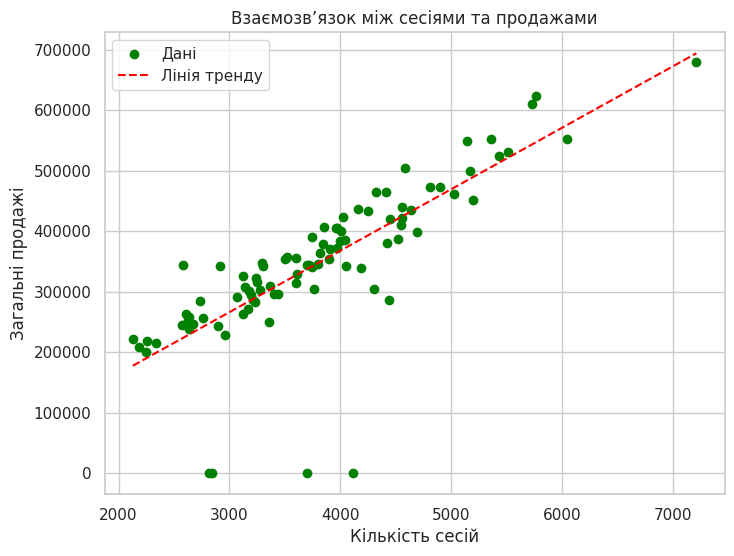

Коефіцієнт кореляції Пірсона: 0.7911
P-value: 0.0000
Кореляція статистично значуща (p < 0.05).


In [ ]:
# 1 ОКількість сесій та загальні продажі за кожну дату, візуалізація, кореляція та статистична значущість
daily_data = df.groupby('date').agg(
    sessions=('session_id', 'nunique'),
    sales=('price', 'sum')
).reset_index()

# Візуалізація: scatter plot для кореляції з лінією тренду
plt.figure(figsize=(8, 6))
plt.scatter(daily_data['sessions'], daily_data['sales'], color='green', label='Дані')
# Обчислення лінійної регресії
coefficients = np.polyfit(daily_data['sessions'], daily_data['sales'], 1)
polynomial = np.poly1d(coefficients)
# лінія тренду
trendline_x = np.array([daily_data['sessions'].min(), daily_data['sessions'].max()])
trendline_y = polynomial(trendline_x)
plt.plot(trendline_x, trendline_y, color='red', linestyle='--', label='Лінія тренду')
plt.xlabel('Кількість сесій')
plt.ylabel('Загальні продажі')
plt.title('Взаємозв’язок між сесіями та продажами')
plt.grid(True)
plt.legend()
plt.show()

# Обчислення коефіцієнта кореляції Пірсона та p-value
corr, p_value = pearsonr(daily_data['sessions'], daily_data['sales'])
print(f"Коефіцієнт кореляції Пірсона: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Кореляція статистично значуща (p < 0.05).")
else:
    print("Кореляція не є статистично значущою (p >= 0.05).")

Графік "Взаємозв’язок між сесіями та продажами" показує **сильну позитивну кореляцію** (коефіцієнт Пірсона 0.7911) між кількістю сесій та загальними продажами, що підтверджується статистично значущим p-value (0.0000 < 0.05). Це вказує на те, **що зростання сесій, як правило, супроводжується підвищенням продажів**.

In [ ]:
# 2 Кореляція продажів між топ-3 континентами та статистична значущість
total_sales_continent = df.groupby('continent')['price'].sum().sort_values(ascending=False)
top3_continents = total_sales_continent.head(3).index.tolist()
print(f"Топ-3 континенти: {top3_continents}")
daily_sales_cont = df[df['continent'].isin(top3_continents)].pivot_table(
    index='date', columns='continent', values='price', aggfunc='sum'
).fillna(0)
# Матриця кореляцій
corr_matrix = daily_sales_cont.corr()
print("Матриця кореляцій:")
print(corr_matrix)
# пари континентів
pairs = []
for i in range(len(top3_continents)):
    for j in range(i + 1, len(top3_continents)):
        pairs.append((top3_continents[i], top3_continents[j]))
# Аналіз статистичної значущості для кожної пари
for cont1, cont2 in pairs:
    corr, p_value = pearsonr(daily_sales_cont[cont1], daily_sales_cont[cont2])
    print(f"\nПара: {cont1} - {cont2}")
    print(f"Коефіцієнт кореляції Пірсона: {corr:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Кореляція статистично значуща (p < 0.05).")
    else:
        print("Кореляція не є статистично значущою (p >= 0.05).")

Топ-3 континенти: ['Americas', 'Asia', 'Europe']
Матриця кореляцій:
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.792025  0.770586
Asia       0.792025  1.000000  0.768427
Europe     0.770586  0.768427  1.000000

Пара: Americas - Asia
Коефіцієнт кореляції Пірсона: 0.7920
P-value: 0.0000
Кореляція статистично значуща (p < 0.05).

Пара: Americas - Europe
Коефіцієнт кореляції Пірсона: 0.7706
P-value: 0.0000
Кореляція статистично значуща (p < 0.05).

Пара: Asia - Europe
Коефіцієнт кореляції Пірсона: 0.7684
P-value: 0.0000
Кореляція статистично значуща (p < 0.05).


In [ ]:
# 3 Кореляція продажів між каналами трафіку та статистична значущість
channels = df['channel'].unique().tolist()
print(f"Канали трафіку: {channels}")
# Щоденні продажі за каналами
daily_sales_chan = df.pivot_table(
    index='date', columns='channel', values='price', aggfunc='sum'
).fillna(0)
# Матриця кореляцій
corr_matrix = daily_sales_chan.corr()
print("Матриця кореляцій:")
print(corr_matrix)
# пари каналів
pairs = []
for i in range(len(channels)):
    for j in range(i + 1, len(channels)):
        pairs.append((channels[i], channels[j]))

# Аналіз статистичної значущості для кожної пари
for chan1, chan2 in pairs:
    corr, p_value = pearsonr(daily_sales_chan[chan1], daily_sales_chan[chan2])
    print(f"\nПара: {chan1} - {chan2}")
    print(f"Коефіцієнт кореляції Пірсона: {corr:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Кореляція статистично значуща (p < 0.05).")
    else:
        print("Кореляція не є статистично значущою (p >= 0.05).")

Канали трафіку: ['Paid Search', 'Organic Search', 'Direct', 'Undefined', 'Social Search']
Матриця кореляцій:
channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.837833     0.814072       0.604060   
Organic Search  0.837833        1.000000     0.870086       0.583117   
Paid Search     0.814072        0.870086     1.000000       0.596428   
Social Search   0.604060        0.583117     0.596428       1.000000   
Undefined       0.517505        0.526068     0.521961       0.455126   

channel         Undefined  
channel                    
Direct           0.517505  
Organic Search   0.526068  
Paid Search      0.521961  
Social Search    0.455126  
Undefined        1.000000  

Пара: Paid Search - Organic Search
Коефіцієнт кореляції Пірсона: 0.8701
P-value: 0.0000
Кореляція статистично значуща (p < 0.05).

Пара: Paid Search - Direct
Коефіцієнт кореляції Пірсона: 0

Дивлячись на дані, бачимо, що продажі на континентах Америка, Азія та Європа мають міцний зв’язок між собою. Коефіцієнти кореляції Пірсона — 0.7920 (Америка-Азія), 0.7706 (Америка-Європа) та 0.7684 (Азія-Європа) — свідчать про сильну позитивну залежність. Усі p-value дорівнюють 0.0000, що значно менше 0.05, тож ці кореляції є статистично значущими. Це означає, що зростання продажів на одному континенті, ймовірно, супроводжується підвищенням на інших.

In [ ]:
# 4 Аналіз кореляції між продажами топ-5 категорій товарів
total_sales_category = df.groupby('category')['price'].sum().sort_values(ascending=False)
top5_categories = total_sales_category.head(5).index.tolist()
print(f"Топ-5 категорій: {top5_categories}")

# Щоденні продажі за топ-5 категоріями
daily_sales_cat = df[df['category'].isin(top5_categories)].pivot_table(
    index='date', columns='category', values='price', aggfunc='sum'
).fillna(0)

# Матриця кореляцій
corr_matrix = daily_sales_cat.corr()
print("Матриця кореляцій:")
print(corr_matrix)

# Створюємо пари категорій вручну без itertools
pairs = []
for i in range(len(top5_categories)):
    for j in range(i + 1, len(top5_categories)):
        pairs.append((top5_categories[i], top5_categories[j]))

# Аналіз статистичної значущості для кожної пари
for cat1, cat2 in pairs:
    corr, p_value = pearsonr(daily_sales_cat[cat1], daily_sales_cat[cat2])
    print(f"\nПара: {cat1} - {cat2}")
    print(f"Коефіцієнт кореляції Пірсона: {corr:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Кореляція статистично значуща (p < 0.05).")
    else:
        print("Кореляція не є статистично значущою (p >= 0.05).")

Топ-5 категорій: ['Sofas & armchairs', 'Chairs', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards']
Матриця кореляцій:
category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.592913   
Bookcases & shelving units  0.592913                    1.000000   
Cabinets & cupboards        0.514609                    0.539428   
Chairs                      0.554500                    0.637090   
Sofas & armchairs           0.535378                    0.666194   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.514609  0.554500           0.535378  
Bookcases & shelving units              0.539428  0.637090           0.666194  
Cabinets & cupboards                    1.000000  0.572870           0.65

Дані показують кореляційні зв’язки між продажами категорій: "Sofas & armchairs", "Chairs", "Beds", "Bookcases & shelving units" та "Cabinets & cupboards". Коефіцієнти кореляції Пірсона варіюються від 0.5146 (між "Beds" і "Cabinets & cupboards") до 0.6662 (між "Sofas & armchairs" і "Bookcases & shelving units"), усі з p-value = 0.0000, що вказує на статистично значущу позитивну кореляцію (p < 0.05). Найсильніший зв’язок спостерігається між "Sofas & armchairs" і "Bookcases & shelving units" (0.6662), тоді як найслабший — між "Beds" і "Cabinets & cupboards" (0.5146). Це може свідчити про те, що попит на ці товари частково синхронізується, можливо, через схожі ринкові тренди чи сезонність

Топ-5 категорій: ['Sofas & armchairs', 'Chairs', 'Beds', 'Bookcases & shelving units', 'Cabinets & cupboards']
Матриця кореляцій:
category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.592913   
Bookcases & shelving units  0.592913                    1.000000   
Cabinets & cupboards        0.514609                    0.539428   
Chairs                      0.554500                    0.637090   
Sofas & armchairs           0.535378                    0.666194   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.514609  0.554500           0.535378  
Bookcases & shelving units              0.539428  0.637090           0.666194  
Cabinets & cupboards                    1.000000  0.572870           0.65

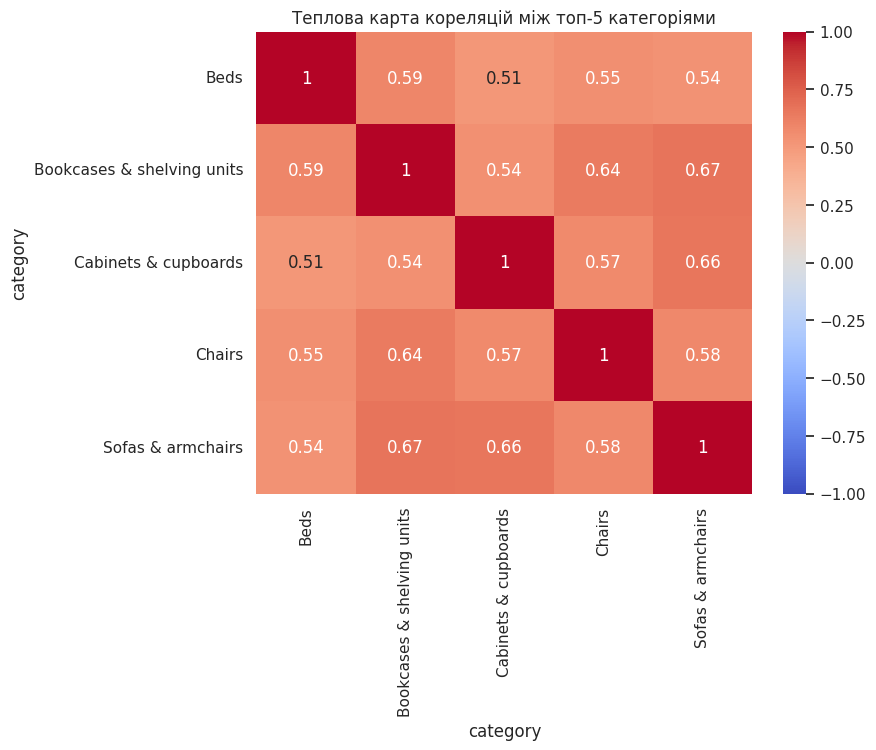

In [ ]:
#Знаходимо топ-5 категорій за загальними продажами
total_sales_category = df.groupby('category')['price'].sum().sort_values(ascending=False)
top5_categories = total_sales_category.head(5).index.tolist()
print(f"Топ-5 категорій: {top5_categories}")

# Щоденні продажі за топ-5 категоріями
daily_sales_cat = df[df['category'].isin(top5_categories)].pivot_table(
    index='date', columns='category', values='price', aggfunc='sum'
).fillna(0)

# Матриця кореляцій
corr_matrix = daily_sales_cat.corr()
print("Матриця кореляцій:")
print(corr_matrix)

# Візуалізація: Теплова карта матриці кореляцій
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Теплова карта кореляцій між топ-5 категоріями')
plt.show()

Поглянувши на теплову карту кореляцій між продажами топ-5 категорій меблів — "Sofas & armchairs", "Chairs", "Beds", "Bookcases & shelving units" та "Cabinets & cupboards" — ми бачимо цікаву картину. Усі категорії демонструють позитивний зв’язок між собою, що радує, адже це може свідчити про загальний інтерес людей до облаштування оселі. Найсильніша дружба (кореляція 0.67) склалася між "Sofas & armchairs" і "Bookcases & shelving units" — мабуть, люди люблять поєднувати затишні дивани з стильними полицями. Трохи менше, але все ще помітно, корелюють "Chairs" з "Bookcases & shelving units" (0.64) і "Sofas & armchairs" з "Cabinets & cupboards" (0.66) — здається, ці товари часто обирають разом для гармонійного інтер’єру.
Трохи слабші зв’язки (від 0.51 до 0.59) ми бачимо між "Beds" і "Cabinets & cupboards" або "Beds" і "Chairs", що може означати, що ліжка живуть своїм життям, а інші меблі частіше купують як доповнення до вітальні чи кухні. Загалом, усі ці кореляції виглядають природно, адже меблі часто обирають комплектами, залежно від потреб чи сезону.

#Статистичний аналіз відмінностей між групами


1.   Аналіз продажів за кожну дату зареєстрованих та незареєстрованих користувачів
2.   Аналіз відмінностей щоденних сесій між каналами трафіку



In [ ]:
# 1 Аналіз продажі за кожну дату зареєстрованих та незареєстрованих користувачів
sessions_per_channel = df.groupby('channel')['session_id'].nunique()
channels = df['channel'].unique()
sessions_by_channel = [df[df['channel'] == ch]['session_id'].nunique() for ch in channels]
daily_sessions = df.groupby(['date', 'channel'])['session_id'].nunique().unstack(fill_value=0)

# Застосуємо тест Крускала-Валіса для порівняння кількості сесій між каналами
stat, p = kruskal(*[daily_sessions[ch] for ch in daily_sessions.columns])
print(f"Статистика тесту Крускала-Валіса: {stat:.2f}, p-значення: {p:.4f}")
if p < 0.05:
    print("Відмінності між каналами статистично значущі")
else:
    print("Відмінності не є статистично значущими")

Статистика тесту Крускала-Валіса: 368.98, p-значення: 0.0000
Відмінності між каналами статистично значущі


Дивлячись на результати, можна сказати, що канали, через які користувачі заходять, справді мають свій характер! Тест Крускала-Валіса показав статистику 368.98 із p-значенням 0.0000, що значно менше 0.05, тож відмінності між кількістю сесій на різних каналах є статистично значущими. Це означає, що деякі канали, мабуть, приваблюють більше відвідувачів.

In [ ]:
# 2 Аналіз відмінностей щоденних сесій між каналами трафіку
daily_sessions = df.groupby(['date', 'channel'])['session_id'].nunique().unstack(fill_value=0)
# Застосуємо тест Крускала-Валіса
stat, p = kruskal(*[daily_sessions[col] for col in daily_sessions.columns])
print(f"Статистика Крускала-Валіса: {stat:.2f}, p-значення: {p:.4f}")
if p < 0.05:
    print("Відмінності між каналами статистично значущі.")
else:
    print("Відмінності між каналами статистично незначущі.")

Статистика Крускала-Валіса: 368.98, p-значення: 0.0000
Відмінності між каналами статистично значущі.


Результати тесту Крускала-Валіса (статистика 368.98, p-значення 0.0000) чітко показують, що канали трафіку справді відрізняються за кількістю щоденних сесій — і ця різниця статистично значуща (p < 0.05). Деякі канали, ймовірно, приваблюють набагато більше уваги, ніж інші, що дає змогу зосередитися на ефективних і оптимізувати слабкі. Це як перевірка, де "переможці" серед каналів, і тепер час їх нагородити додатковими зусиллями!

Посилання на табло стролі телінг [(https://public.tableau.com/views/Onlinefurniturestore/Revenuebymetrics?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)]